In [62]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy.stats

In [3]:
df = pd.read_csv("bno_cases_data.csv")
df.head()
simulations = 1000
bins = 100

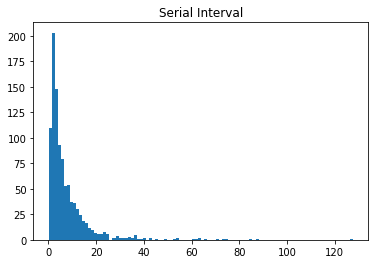

In [111]:
mean = 4.7
sd = 2.9
serial_interval = np.random.lognormal(math.log(mean), math.log(sd), simulations)

plt.hist(serial_interval, bins=bins)
plt.title("Serial Interval");

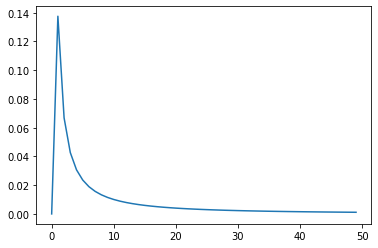

In [114]:
days = list(range(0, 50))

def serial_interval(n):
    return scipy.stats.lognorm.pdf(n, sd)

plt.plot(days, [ serial_interval(n) for n in days ], label='lognorm pdf');

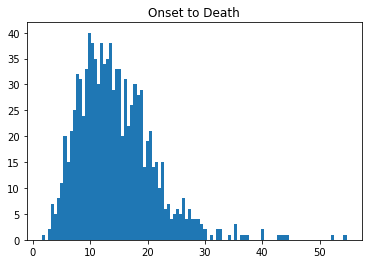

In [5]:
shape = 4.726
rate = 0.3151
onset_to_death = np.random.gamma(shape, rate, simulations) * 10

plt.hist(onset_to_death, bins=bins)
plt.title("Onset to Death");

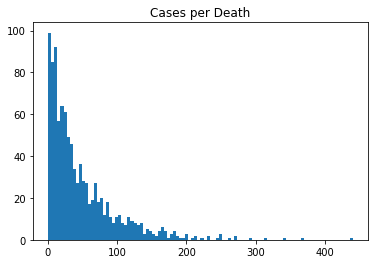

In [6]:
case_fatality_ratio = 0.02
cases_per_death = np.random.geometric(case_fatality_ratio, simulations)

plt.hist(cases_per_death, bins=bins)
plt.title("Cases per Death");

Formula for poison lambda at time t:

$$\lambda_t = \sum_{s = 1}^{t - 1} y_s w(t - s)$$

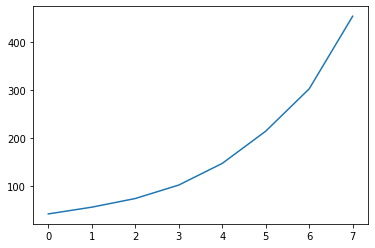

In [158]:
# Example a single death
death = "2020-03-24"
reproduction_number = 2

probable_days_ago_onset = int(np.random.gamma(shape, rate) * 10)
n_cases_per_day = np.random.geometric(case_fatality_ratio)
incidences = [n_cases_per_day]

for t in range(1, probable_days_ago_onset):
    lambda_t = sum([ incidences[s] * serial_interval(t - s) for s in range(0, t) ])
    incidences_t = np.random.poisson(lambda_t * reproduction_number)
    
    incidences.append(incidences[t - 1] + incidences_t)

plt.plot(incidences);